In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path="C:/Users/welcome/Desktop/advanced_programming_assignment2/spotify_dataset.csv"
data = pd.read_csv(file_path)

In [7]:
# **Data Preprocessing and EDA*
# Display the first few rows of the dataset
print(data.head())

# Summary statistics of numerical features
print(data.describe())

print(data.info())


   Sr_no                track_id                 artists  \
0      0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love 

In [8]:
#show missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values
data.dropna(inplace=True)


Missing values in each column:
Sr_no               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Sr_no               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
# Define features and target variable
features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
            'tempo', 'time_signature', 'track_genre']
target = 'popularity'

# Display first few rows of the dataset
print(data.head())

# Explore distribution of numerical features
numerical_features = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Define categorical features
categorical_features = ['explicit', 'track_genre']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical features to numeric using Label Encoding
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])
    
# Display first few rows of the dataset after encoding
print(data.head())



   Sr_no                track_id                 artists  \
0      0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love 

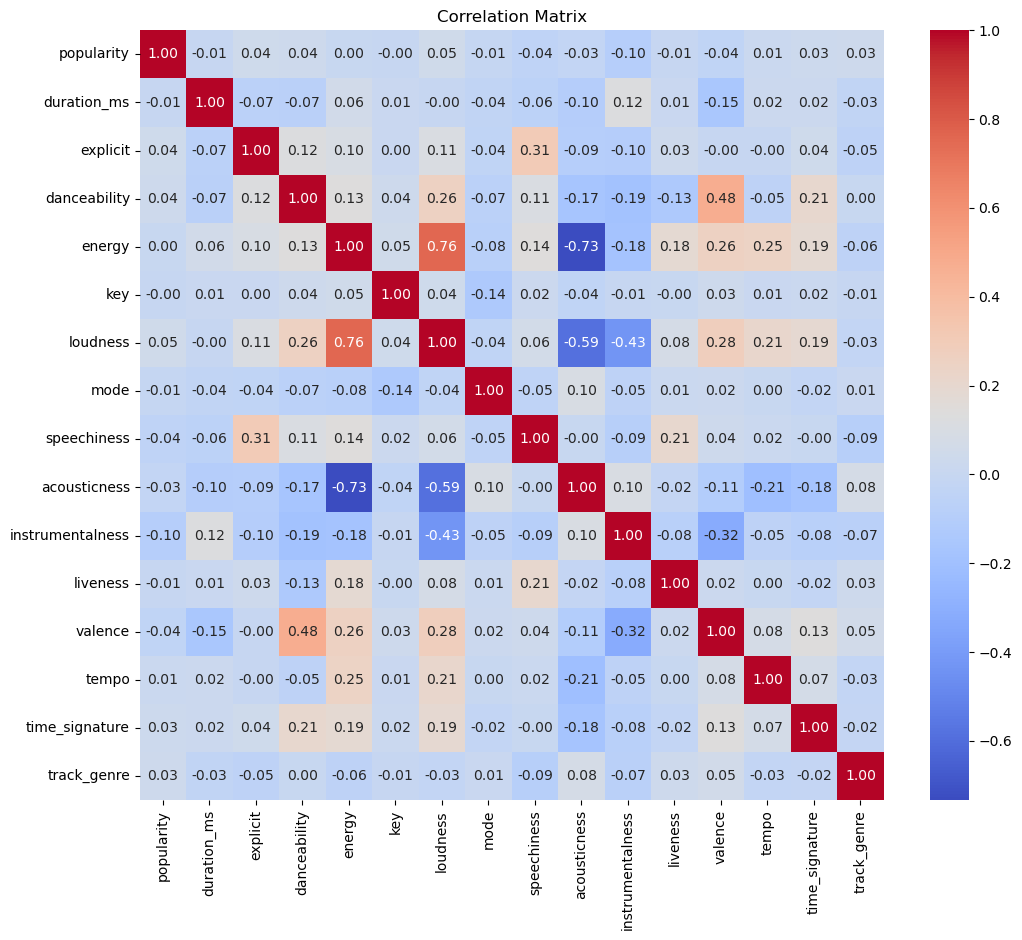

In [11]:
# Adjust the list of non-numeric column names
non_numeric_cols = ['Sr_no', 'track_id', 'artists', 'album_name', 'track_name']

# Drop non-numeric columns
data_numeric = data.drop(non_numeric_cols, axis=1)

# Handle missing values
data_numeric = data_numeric.dropna()


# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for popularity: p-value = 0.0
Skewness for popularity: 0.0463928702726021


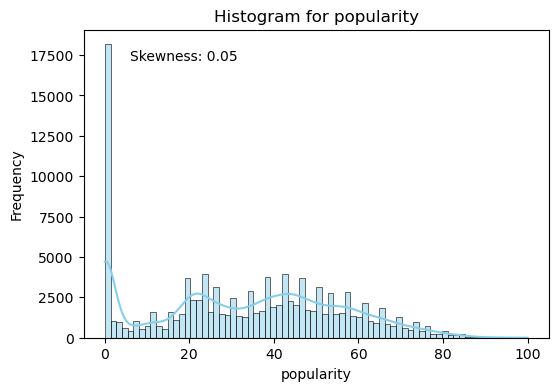

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for duration_ms: p-value = 0.0
Skewness for duration_ms: 11.195678680622468


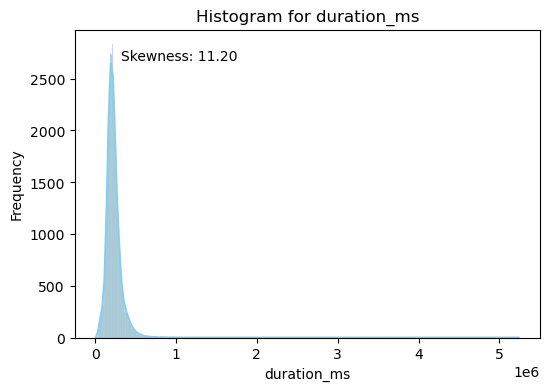

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for explicit: p-value = 0.0
Skewness for explicit: 2.9646750996178666


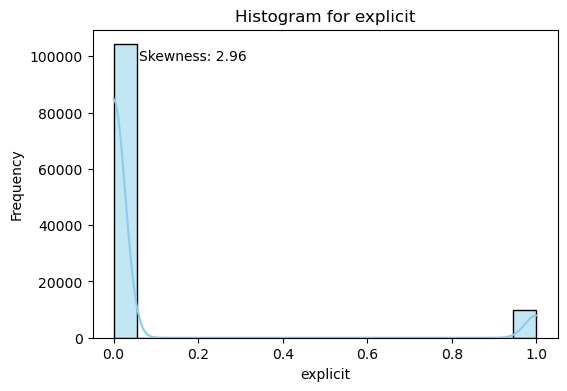

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for danceability: p-value = 0.0
Skewness for danceability: -0.39949988030106354


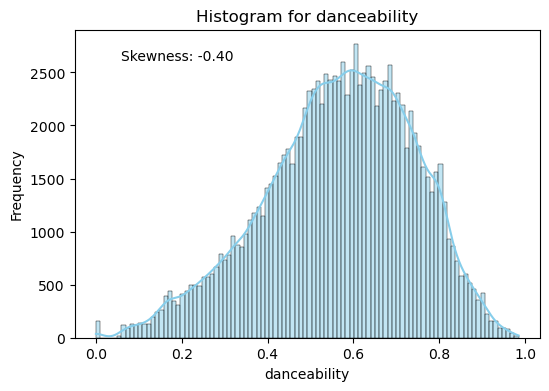

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for energy: p-value = 0.0
Skewness for energy: -0.5969973650738502


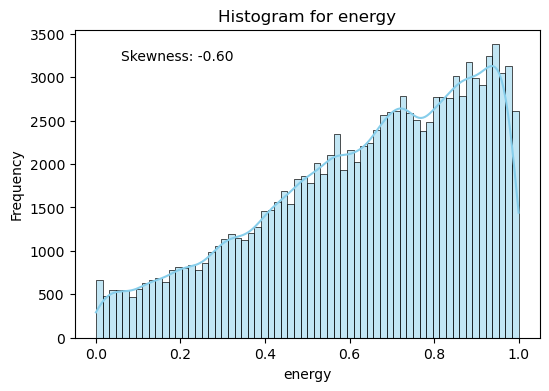

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for key: p-value = 0.0
Skewness for key: -0.008488677317684023


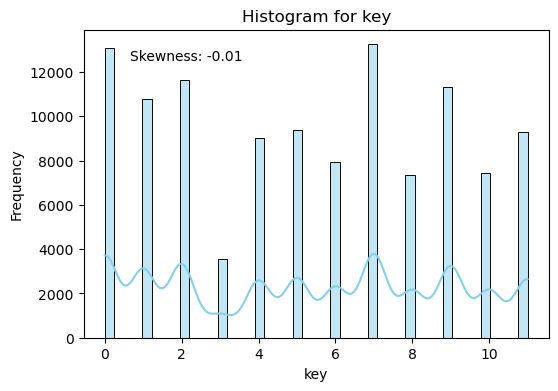

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for loudness: p-value = 0.0
Skewness for loudness: -2.006514401882233


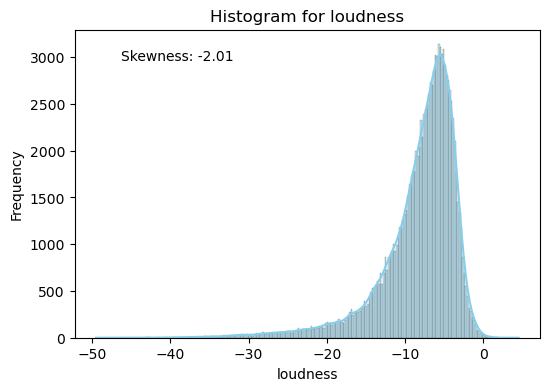

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for mode: p-value = 0.0
Skewness for mode: -0.5723181321053646


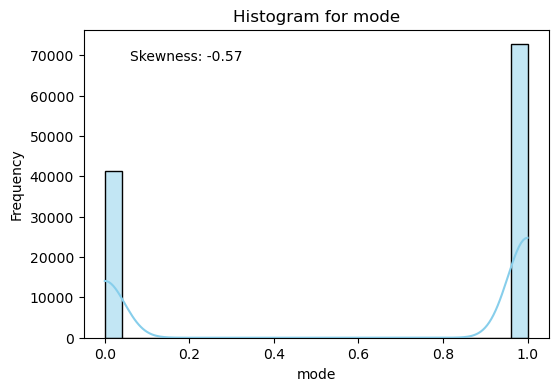

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for speechiness: p-value = 0.0
Skewness for speechiness: 4.647431766541186


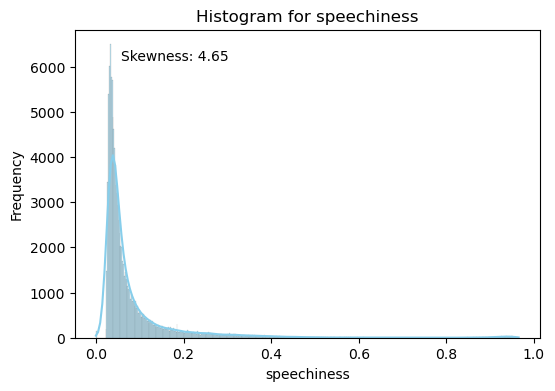

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for acousticness: p-value = 0.0
Skewness for acousticness: 0.7273113722249731


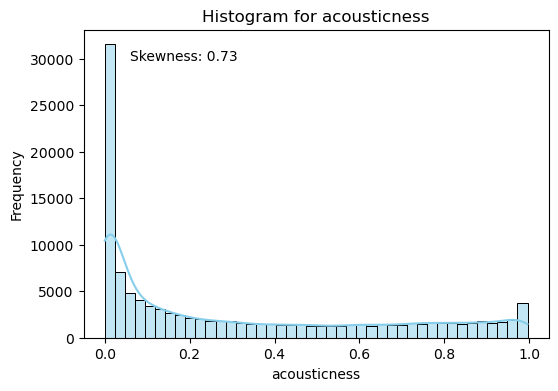

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for instrumentalness: p-value = 0.0
Skewness for instrumentalness: 1.7343693842069297


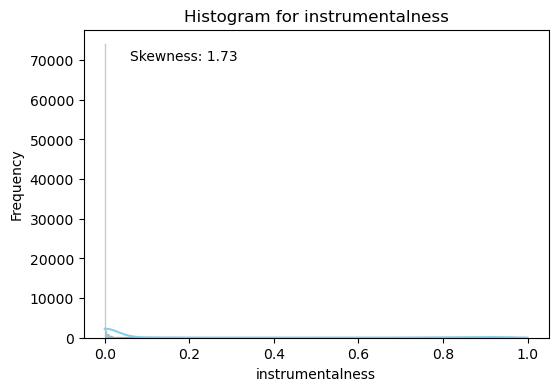

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for liveness: p-value = 0.0
Skewness for liveness: 2.1057001231140444


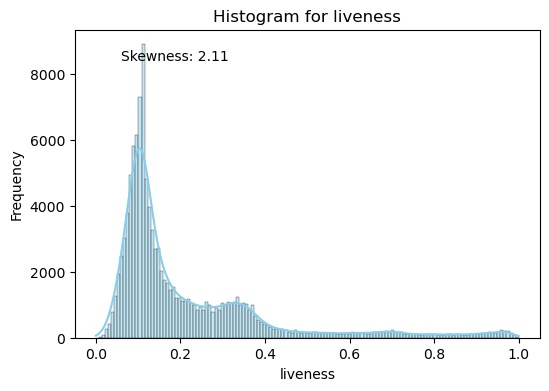

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for valence: p-value = 0.0
Skewness for valence: 0.11509508902073899


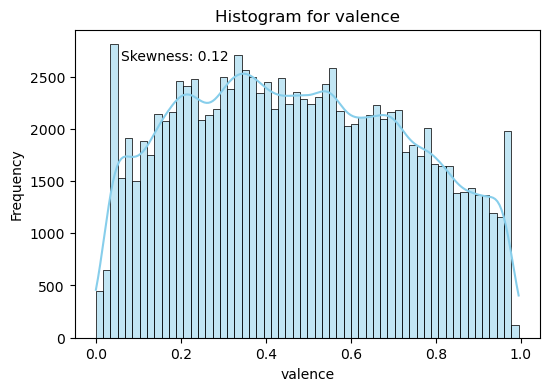

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for tempo: p-value = 0.0
Skewness for tempo: 0.23230454604815698


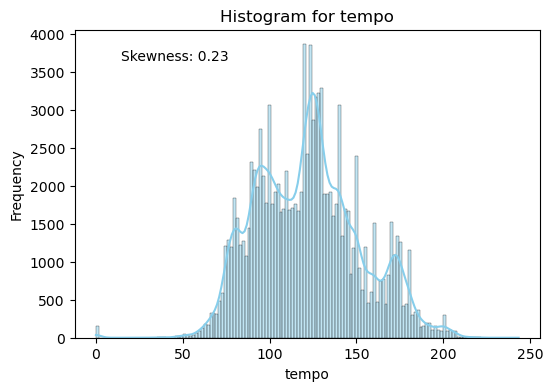

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for time_signature: p-value = 0.0
Skewness for time_signature: -4.0982416831284


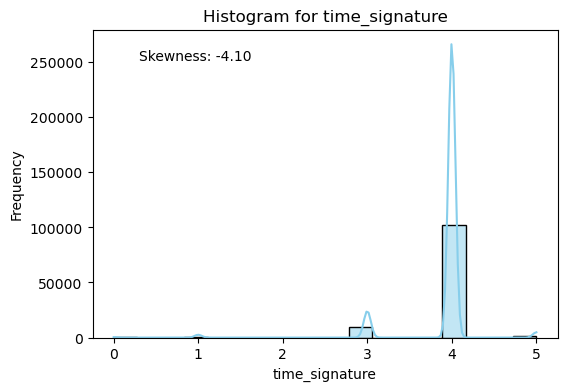

C:\Users\welcome\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for track_genre: p-value = 0.0
Skewness for track_genre: 6.6461859826347514e-06


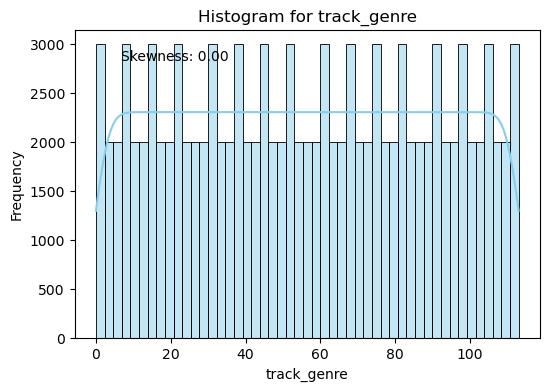

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew

# Check normality using Shapiro-Wilk Test and skewness
for col in data_numeric.columns:
    if data_numeric[col].dtype != 'object':
        # Shapiro-Wilk Test
        stat, p = shapiro(data_numeric[col])
        print(f"Shapiro-Wilk Test for {col}: p-value = {p}")
        
        # Skewness
        skewness = skew(data_numeric[col])
        print(f"Skewness for {col}: {skewness}")
        
        # Visualize histogram
        plt.figure(figsize=(6, 4))
        sns.histplot(data_numeric[col], kde=True, color='skyblue')
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.text(0.1, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=10)
        plt.show()


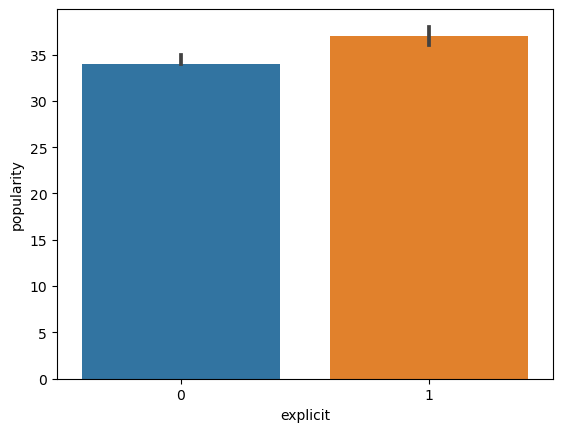

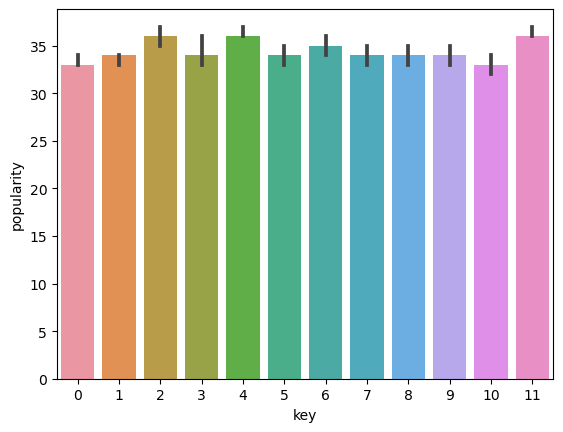

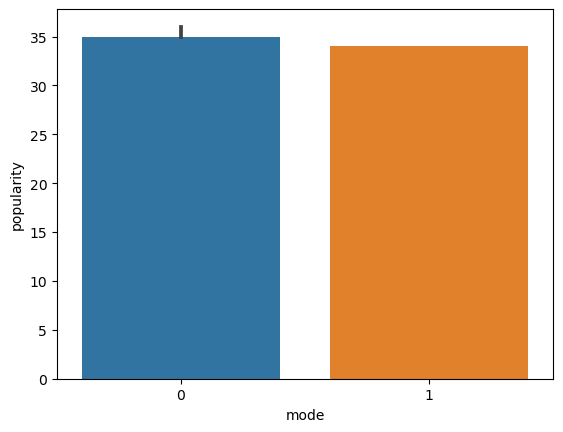

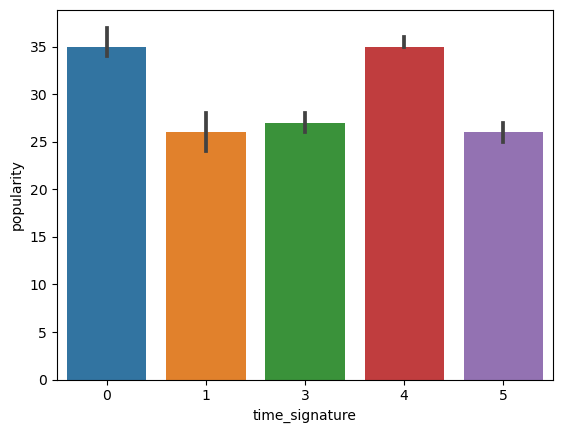

In [14]:
#selecting discrete features among the numerical features and checking if it has a relationship with the popularity
feature_numerical_disc=[feature for feature in data_numeric if data_numeric[feature].nunique()<50]
feature_numerical_disc

for feature in feature_numerical_disc:
    dataset=data_numeric.copy()
    sns.barplot(x=feature, y=dataset['popularity'], data=dataset, estimator=np.median)
    plt.show()


In [3]:
# Verify the column names
print(data.columns)

# Adjust the list of non-numeric column names
non_numeric_cols = ['Sr_no', 'track_id', 'artists', 'album_name', 'track_name']

# Drop non-numeric columns
data_numeric = data.drop(non_numeric_cols, axis=1)

# Handle missing values
data_numeric = data_numeric.dropna()

print(data_numeric.columns)


Index(['Sr_no', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to normalize
numerical_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'time_signature']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical data
scaler.fit(data_numeric[numerical_columns])

# Transform the numerical data using the fitted scaler
data_numeric[numerical_columns] = scaler.transform(data_numeric[numerical_columns])


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

# Step 1: Define X and y
X = data_numeric.drop('popularity', axis=1)
y = data_numeric['popularity']

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Engineering - Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Step 4: Data Preprocessing - Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Step 5: Define a list of models to test
models = [
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge()),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42)),
    ("XGBRegressor", XGBRegressor())
]

# Step 6: Iterate over models and evaluate performance
for name, model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)
    
    # Print the model name and score
    print(f"{name}: {score}")


LinearRegression: 0.0687717464816211
Ridge: 0.06876672139584616
RandomForestRegressor: 0.5055752501120484
XGBRegressor: 0.4066527866577664


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np

# Step 1: Define X and y
X = data_numeric.drop('popularity', axis=1)
y = data_numeric['popularity']

# Step 2: Data Preprocessing
# Encode categorical variables if any
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Engineering
# Example: Adding Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Step 4: Data Preprocessing - Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Step 5: Model Selection and Hyperparameter Tuning
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()),
                                   ('regressor', Ridge())]),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Grid search parameters for Ridge Regression
ridge_param_grid = {'regressor__alpha': np.logspace(-3, 3, 7)}

# Grid search parameters for Random Forest
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

# Grid search parameters for Gradient Boosting
gb_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [3, 5, 7],
                 'learning_rate': [0.01, 0.1, 0.3]}

# Grid search parameters for XGBoost
xgb_param_grid = {'n_estimators': [100, 200, 300],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.3]}

# Grid search for each model
best_models = {}
for name, model in models.items():
    if name == 'Linear Regression':
        grid_search = GridSearchCV(model, param_grid=ridge_param_grid, cv=5, scoring='r2')
    elif name == 'Random Forest':
        grid_search = GridSearchCV(model, param_grid=rf_param_grid, cv=5, scoring='r2')
    elif name == 'Gradient Boosting':
        grid_search = GridSearchCV(model, param_grid=gb_param_grid, cv=5, scoring='r2')
    elif name == 'XGBoost':
        grid_search = GridSearchCV(model, param_grid=xgb_param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_

# Step 6: Evaluate the Models
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R-squared score: {r2}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Feature Selection
selected_features = ['danceability', 'energy', 'loudness', 'tempo', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence']

# Define X (features) and y (target variable)
X = data_numeric[selected_features]
y = data_numeric['track_genre']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to hold classifier instances
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(kernel='linear', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Loop over classifiers, train, predict and evaluate
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name} Accuracy: {accuracy}")